In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


C:\Users\Isiah Turner\AppData\Local\Temp\ipykernel_20744\3332377101.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Setting up the pandas dataframe

In [2]:
# Creating a variable list that will be the columns header
variableList = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long'
                , 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Reading in the data into a pandas dataframe
data = pd.read_csv('magic04.data', names = variableList)

# Computers can't decipher strings as well as numbers, so need to convert the 
# g's and h's as 0 and 1 integers
data['class'] = data['class'].apply(lambda x: int(1) if x == 'g' else int(0))
# data["class"] = (data["class"] == "g").astype(int)

# Visualizing the data to make sure the changes went through
data



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


Next we are going to see if we can classify the samples as gamma or hadron, this method is called Classification

Intro to machine learning:
- What is Machine Learning? Machine learning is a subdomain of computer science that
    focuses on algorithms to help computers learn without explicit programming

- Our columns are our features, these are passed into our model to predict the label 
    (in this case the 'class' column)

- When you are working with a true label (a value we know for sure is the outcome), that
    is supervised learning

- Types of Machine Learning:
    1. Supervised Learning: where we use labeled in
    puts which means we have a corresponding output. We do use these to train models and to learn outputs

    2. Unsupervised Learning: where we use unlabeled data to have the machines
    find patterns within the data

    3. Reinforcement Learning: there's an agent learning in some kind of interactive 
    environment based on rewards and penalties

- All machine learning models have inputs into the model and the output that the model produces. The inputs INTO the model are called FEATURE VECTORS

- When dealing with nominal (orderless) categorical data we have to perform 'One-hot Encoding'. This is where we go by a 0 or 1 system depending on the location of the matching category. So let's say we have a list of countries, ['USA', 'Italy', 'India'], a USA encoding would be [1, 0, 0] and Italy would be [0, 1, 0]

Type of Predictions our Supervised Learning Models can get:

1. Classification: predicting discrete classes (hot dog vs hamburger vs ice cream) or binary classification (hot dog vs not hot dog)

2. Regression: predicting continuous classes



How to Evaluate and train a model/know a model is doing well for a supervised learning model:

- Each row of a feature vector dataset will be fed into the model to output a prediction. Then we compare the predicted measure to the actual measure to see how far off the model's prediction was. 
    - The tinkering of the model after this evaluation is what we call 'training'

- We can't feed the entire dataset to the model, otherwise when we predict the next time it is biased and using data that is already seen. So the datasets will need to get broken up for different roles. 
    1. Training dataset: roughly around 60% or 80% of the dataset
    2. Validation dataset: roughly around 10% or 20% of the dataset
    3. Testing dataset: roughly around 10% or 20% of the dataset

1. We feed in the training dataset and get a vector of predictions that corresponds with each sample that was put into the model

2. To evaluate the model, we look for the difference between the prediction and the actual model. This is called 'Loss' and we want to do our best to minimize that loss during this 'training' phase

3. We now feed in the validation dataset to act as a REALITY CHECK to ensure the model can handle unseen data
    - At this step though, the Loss NEVER gets fed back into the model because we aren't training the model here
    - If you keep peeking at your test data and using that to tune, it's a bit like studying for class using a practice test that is exactly the same as the real test -- you're not really learning the material, you're just learning that one specific test.

4. Loop through the models and find the model that produces the lowest loss

5. Now run the test dataset through the best model to see how generalizable the model is
    - This is the FINAL reported performance





Metrics of Performance:

- What is really loss?
    Loss is the difference between the prediction and the actual values. LOSS GETS LOWER AS THE MODEL'S PERFORMANCE GETS BETTER

    1. L1 Loss: The absolute value function is shaped like a 'V' on a graph. This means that the farther you are, the greater your loss is
        -loss = sum(|yReal - yPredicted|)

    2. L2 Loss: This function is a quadratic function and has the 'U' shape. This means that if its close then the penalty is very minimal, but if it is far then then the penalty is much much more
        -loss = sum((yReal - yPredicted)**2)

    3. Binary Cross-Entropy Loss: The loss function used to measure and evaluate the loss during binary classification
        -loss = -1/N * sum(yReal * log(yPredicted) + (1-yReal) * log((1-yPredicted)))

- Accuracy
    1. Accuracy is how much did you get correct out of the total options

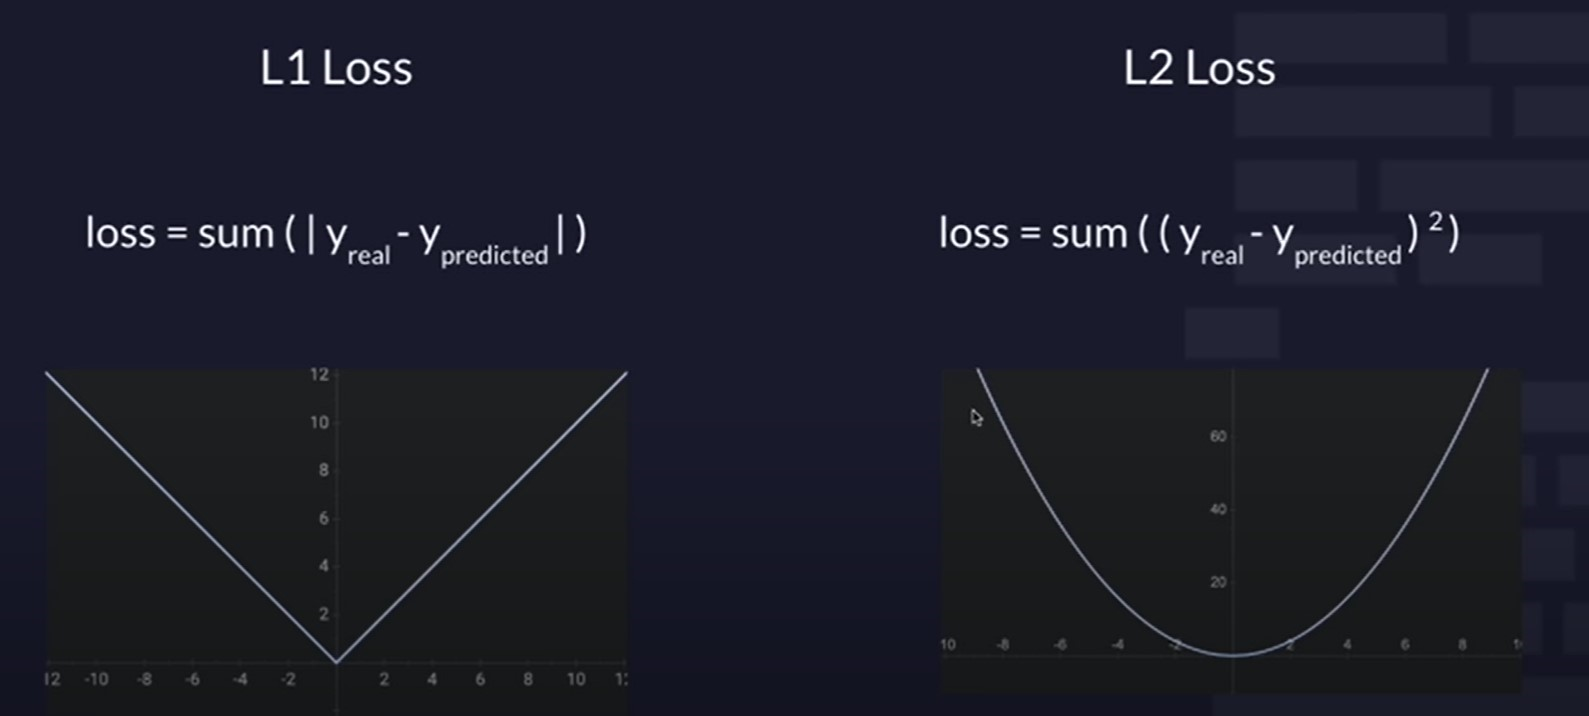

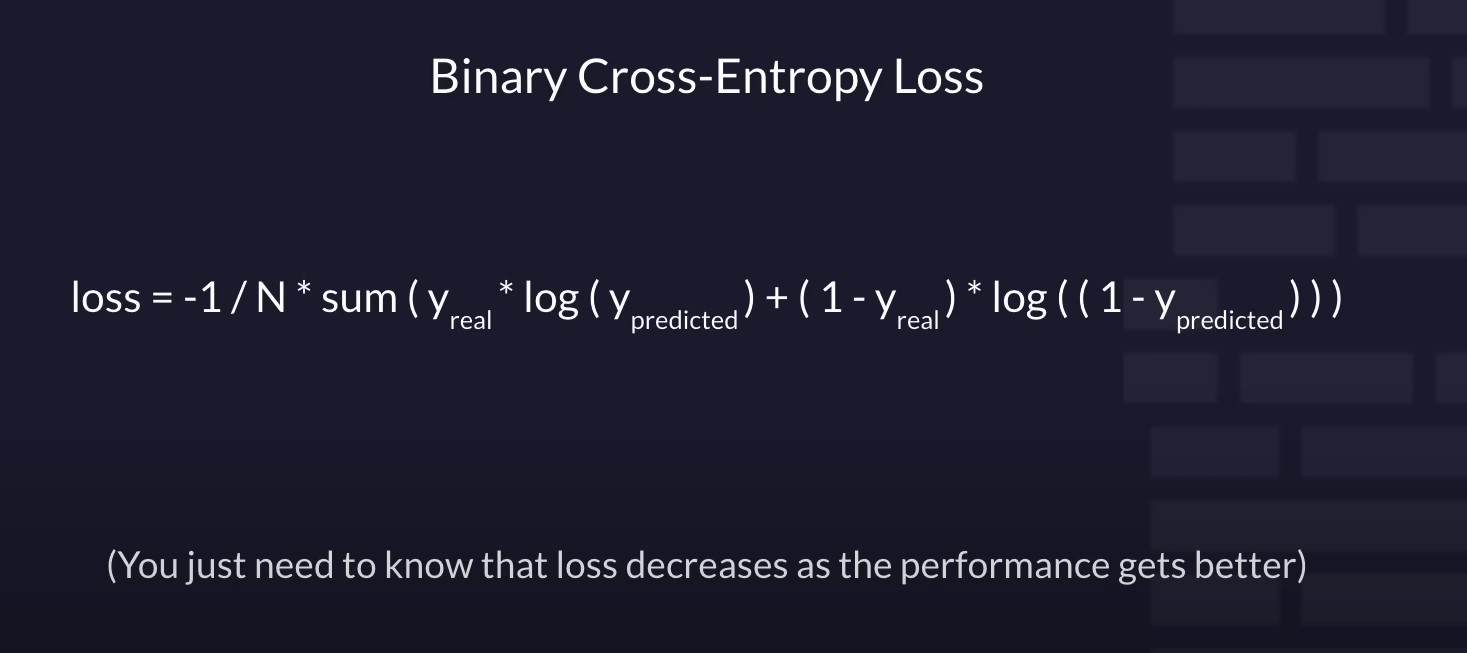

It is a good idea to plot out our data to make sure the features have anything
to do with the class


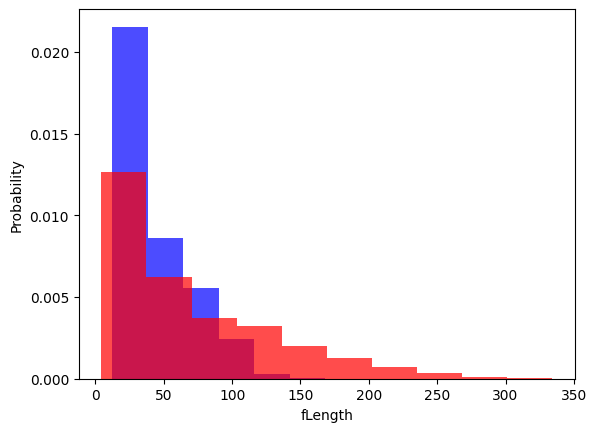

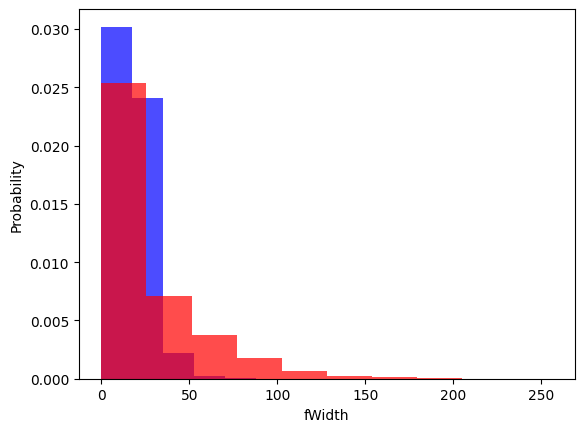

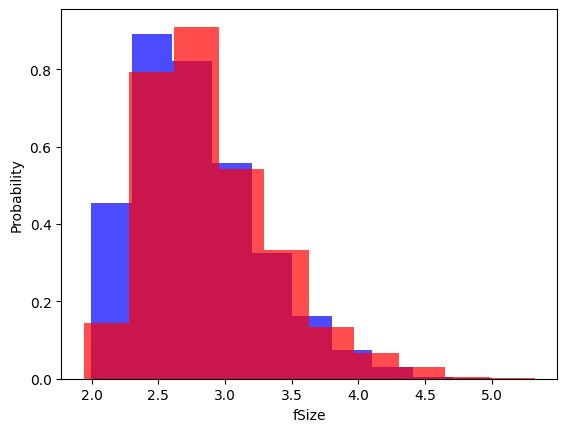

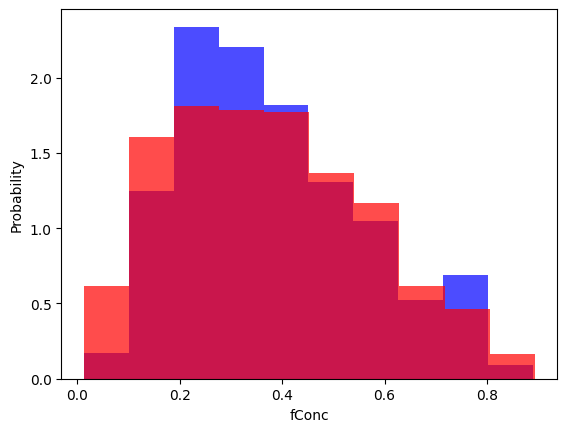

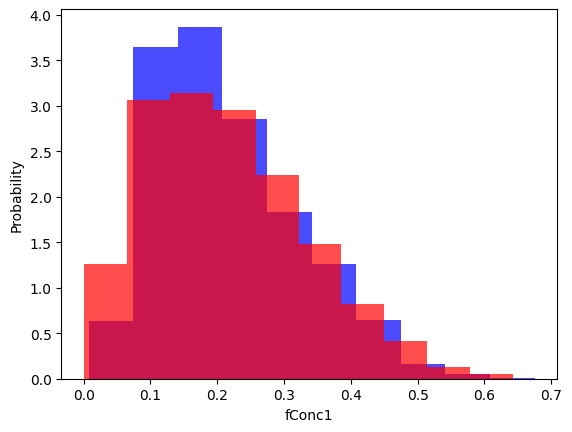

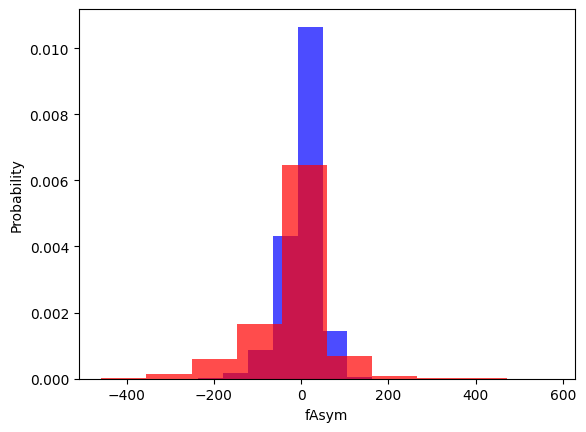

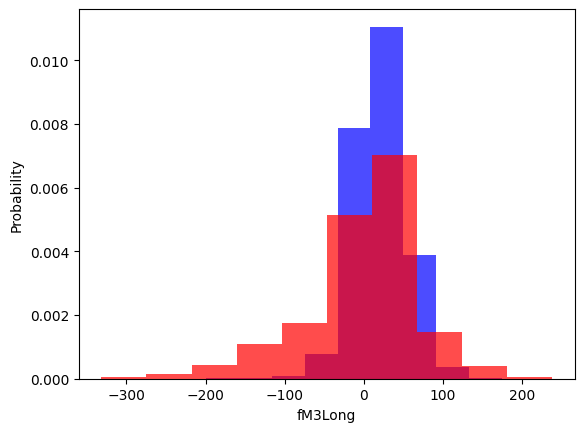

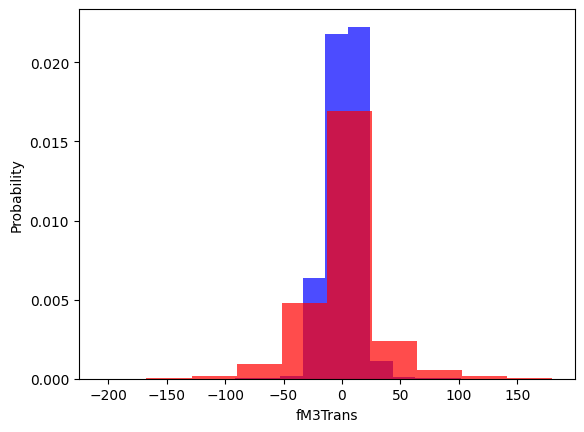

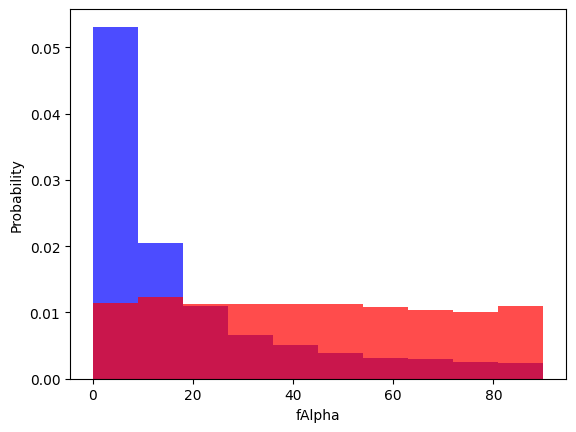

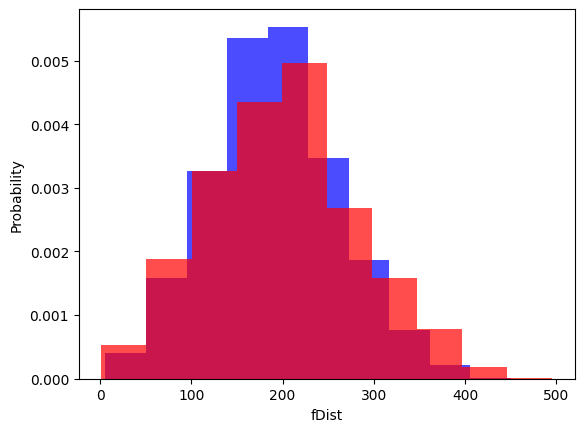

In [3]:
# Looping through all of the column names EXCEPT the 'class' column to see if there are any
# relationships. We use a histogram to get a good idea of what is affecting the data
for label in variableList[:-1]:
    plt.hist(data[data['class'] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(data[data['class'] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.show()

Creating the Training, Validation and Test datasets

In [4]:
# THis is where we split the dataset up. Splitting the dataframe into three sections. We
# first randomize the entire dataframe then split the first 60% into training, 20% into validation
# and 20% into test
train, valid, test = np.split(data.sample(frac= 1), [int(0.6 * len(data)), int(0.8*len(data))])

In [6]:
len(train) + len(valid) + len(test)
len(data)

19020

Next we want to scale the data to its mean since all of the values are in the hundreds or in the tens. So we scale everything to its mean and standard deviation

In [7]:
# Creating a scalar function
def scale_dataset(dataframe, oversample = False):
    # Grabbing all of the columns except the last one since that is our label
    X = dataframe[dataframe.columns[:-1]].values
    
    # Grabbing our label column
    y = dataframe[dataframe.columns[-1]].values

    # Creating a scalar object
    scaler = StandardScaler()

    # Fitting the x valuues to the standard scaler. Then transforms all of the 
    # values based on that
    X = scaler.fit_transform(X)

    # If we want to oversample, create an oversample object and fit_transform the data to it.
    # All its doing is taking more of the less class
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Creating a 2-D numpy array to return. hstack grabs two arrays and stacks them
    # together horizontally. Numpy is particular about shapes so we have to use the 
    # .reshape method to make the 1-by-1 array (y) a 2-by-1 array. Important, the 
    # -1 tells numpy to infer the shape!
    dataset = np.hstack((X, np.reshape(y, (-1, 1))))

    return dataset, X, y


When checking the spread of the data, there is an uneven amount of gamma and hadron classes, so after checking the spread we may need to oversample the class with a 
higher frequency. 

In [8]:
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0])) # hadrons

# print(len(train))


7452
3960


Scaling all of our datasets and oversampling using our function

In [9]:
train, xTrain, yTrain = scale_dataset(train, oversample= True)
valid, xValid, yValid = scale_dataset(valid, oversample= False)
test, xTest, yTest = scale_dataset(test, oversample= False)

In [10]:
print(len(yTrain[yTrain == 1]))
print(len(yTrain[yTrain == 0]))

print('')
print(len(train), len(valid), len(test))

print(len(data[data['class'] == 1]))
print(len(data[data['class'] == 0]))

7452
7452

14904 3804 3804
12332
6688


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# Creating the model object and telling the model to select based off the 5 nearest neighbors
knnModel = KNeighborsClassifier(n_neighbors = 5)

# Training the model by fitting the trained data set that has gone through standardization and oversampling
knnModel.fit(xTrain, yTrain)